This notebook is for demonstrating the usage of the solver sub-module.

In [1]:
from orangearg.argument.reasoner.models import QuadraticEnergyModel, ContinuousEulerModel, CountinuousDFQuADModel
from orangearg.argument.reasoner.solver import Solver
from orangearg.argument.reasoner.utilities import Adaptor, Collector
import pandas as pd

df_nodes = pd.DataFrame({
    "argument": ["Buy", "Sell", "1", "2", "3", "4", "5"], 
    "coherence": [0.5, 0.5, 0.8, 0.7, 0.3, 0.9, 0.9]
})

df_attacks = pd.DataFrame({
    "source": [0, 1, 3, 4, 5, 6], 
    "target": [1, 0, 2, 3, 4, 2]
})

df_supports = pd.DataFrame({
    "source": [2, 3, 5, 6], 
    "target": [1, 0, 3, 0]
})

In [2]:
# What the data adaptor will do is to transfer the input dataframes into 
# weight and parent vectors that will be used in the next steps
data_adaptor = Adaptor(arguments=df_nodes, weight_col="coherence", attacks=df_attacks, supports=df_supports)
print(f"weights: {data_adaptor.get_weights()}")
print(f"parent_vectors: \n{data_adaptor.get_parent_vectors()}")

weights: [0.5 0.5 0.8 0.7 0.3 0.9 0.9]
parent_vectors: 
[[ 0. -1.  0.  1.  0.  0.  1.]
 [-1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [3]:
qe_model = QuadraticEnergyModel(data_adaptor=data_adaptor)
print(f"strength_vector: {qe_model.strength_vector}")
print(f"weight_vector: {qe_model.weights}")
print(f"parent_vectors: \n {qe_model.parent_vectors}")

strength_vector: [0.5 0.5 0.8 0.7 0.3 0.9 0.9]
weight_vector: [0.5 0.5 0.8 0.7 0.3 0.9 0.9]
parent_vectors: 
 [[ 0. -1.  0.  1.  0.  0.  1.]
 [-1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.]
 [ 0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


Convergence reached at step 51: [0.83879517 0.35903012 0.18565675 0.94283093 0.16630631 0.9
 0.9       ]


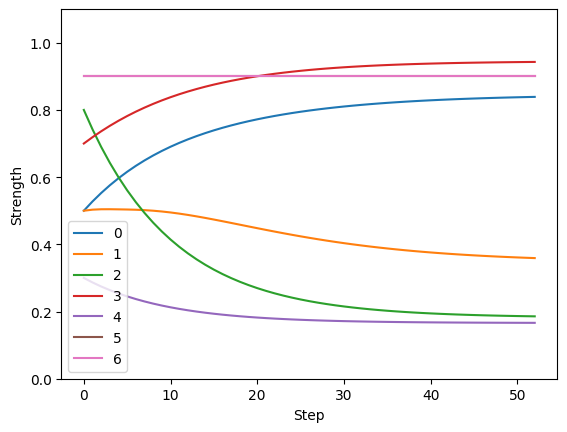

In [4]:
# Solve the input graph
solver = Solver(model=qe_model, step_size=10e-2, max_steps=10e4, epsilon=10e-4)
final_step, data_collector = solver.solve(solver="RK4", collect_data=True)
print(f"Convergence reached at step {final_step}: {qe_model.strength_vector}")
fig1 = data_collector.plot()

Convergence reached at step 52: [0.83892846 0.359919   0.18696155 0.93910559 0.16853653 0.90037571
 0.90037571]


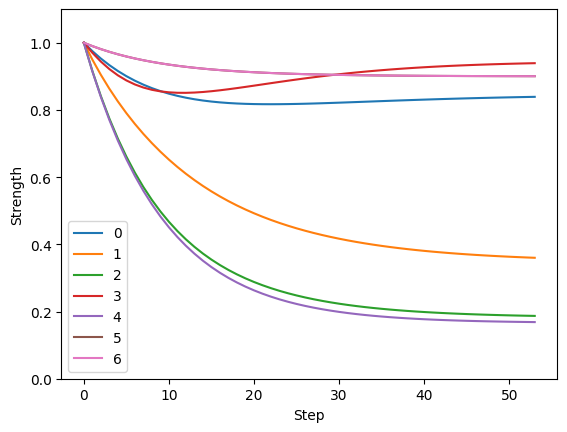

In [5]:
# Use a different method of initializing strength vector
# A better initial strength vector will lead to similar result but
# fewer steps to reach convergence
qe_model.init_strength(init_method="uniform")
final_step, data_collector = solver.solve(solver="RK4", collect_data=True)
print(f"Convergence reached at step {final_step}: {qe_model.strength_vector}")
fig2 = data_collector.plot()

Convergence reached at step 74: [0.97846617 0.02162828 0.00355109 0.96066618 0.0300999  0.9
 0.9       ]


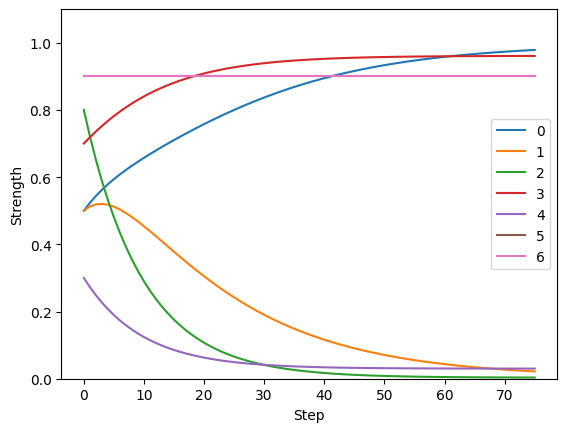

In [6]:
# different solver
cd_model = CountinuousDFQuADModel(data_adaptor=data_adaptor)
solver.model = cd_model
final_step, data_collector = solver.solve(solver="RK4", collect_data=True)
print(f"Convergence reached at step {final_step}: {cd_model.strength_vector}")
fig3 = data_collector.plot()

Convergence reached at step 42: [0.4368861  0.4368861  0.69393663 0.6761328  0.19723922 0.90107753
 0.90107753]


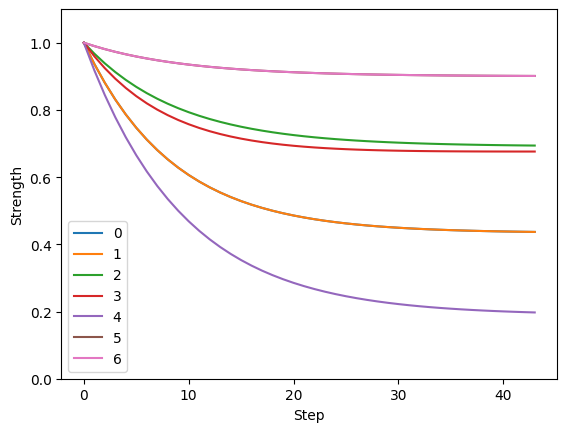

In [7]:
# In case of empty support set
data_adaptor.supports = None
qe_model = QuadraticEnergyModel(data_adaptor=data_adaptor, init_method="uniform")
ce_model = ContinuousEulerModel(data_adaptor=data_adaptor, init_method="uniform")
model = ce_model
solver.model = model
final_step, data_collector = solver.solve(solver="RK4", collect_data=True)
print(f"Convergence reached at step {final_step}: {model.strength_vector}")
fig4 = data_collector.plot()

In [8]:
from matplotlib import pyplot as plt

def show_two_figs(fig_l, fig_r):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    axs[0].imshow(fig_l.canvas.renderer._renderer)
    axs[0].axis("off")
    axs[1].imshow(fig_r.canvas.renderer._renderer)
    axs[1].axis("off")
    plt.tight_layout()
    plt.show()

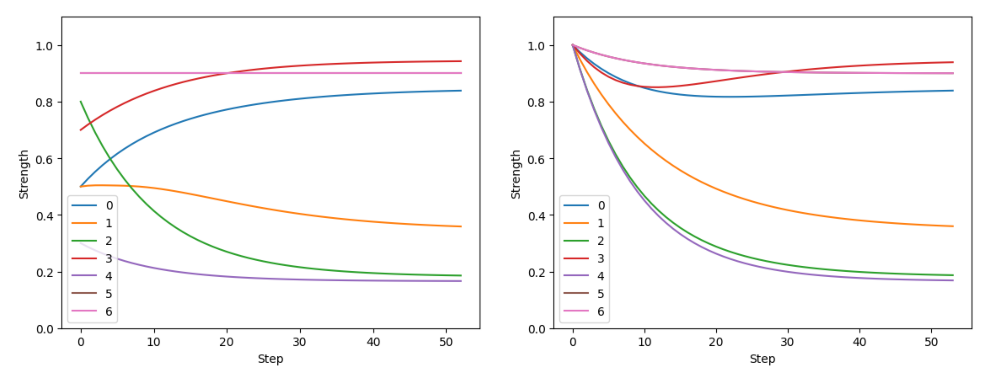

In [9]:
# Weight vs. Uniform
show_two_figs(fig1, fig2)

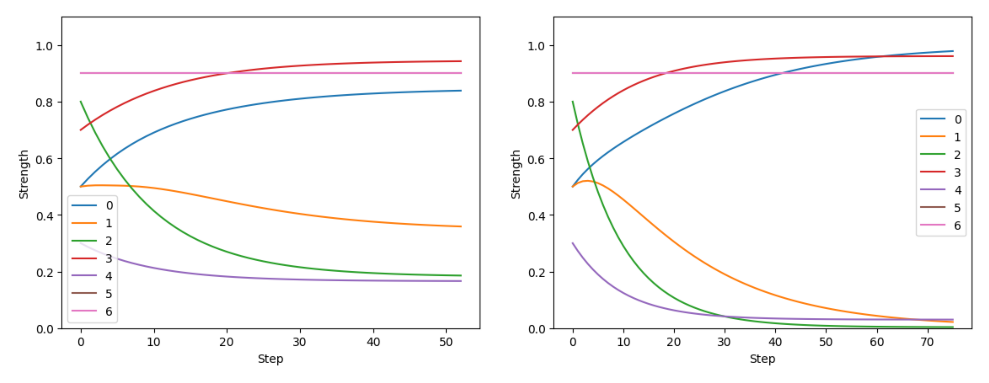

In [10]:
# Quadratic Energy vs. Euler
show_two_figs(fig1, fig3)

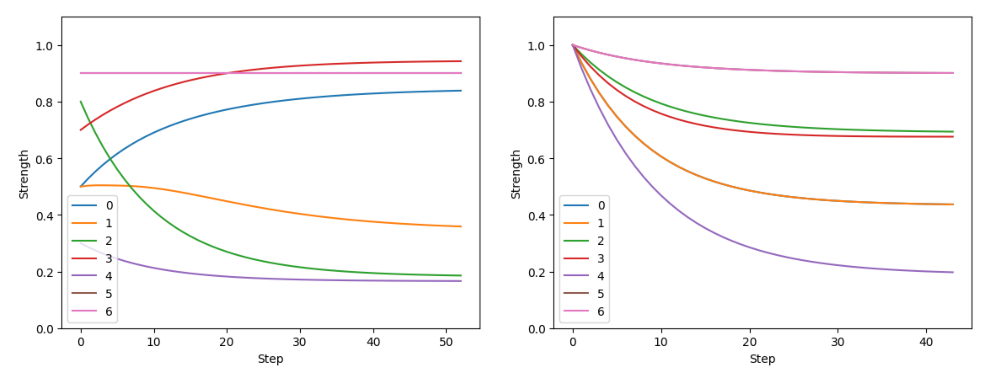

In [11]:
# With vs. without supports
show_two_figs(fig1, fig4)